<a href="https://colab.research.google.com/github/mag381/AI/blob/main/07_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ライブラリのインポートなど
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# MNIST画像データの読み込みと、訓練・テストデータとして格納
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# データ形式を変更（reshape）
# x_train.shape[0] は x_train の数 (画像が100枚なら 100)
# reshape は入力値にデータ数を必要とするため
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:

# 画素の濃淡データを正規化（255で割るだけ）
# 濃淡データは0-255の整数だが、浮動小数点にするため 'float32' を使った
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
y_train.shape

(60000,)

In [ ]:
# 正解データは0-9の整数値が入っているので、これをOne-hotベクトル（要素10個）に変える
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
# モデルの構造を定義する 
# 数珠つなぎの構造にするので、最初に Sequential() を使う
model = Sequential()
# Conv2D は二次元の畳み込み操作、3x3のフィルターを16種類使う、
# padding して画像サイズを保つ、画像のピクセル数を指定、
# 活性化関数はRELUを使う
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(28, 28, 1), activation='relu'))
# マックスプーリングを使う
model.add(MaxPooling2D(pool_size=(2, 2)))               
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 過学習防止のためにドロップアウトを使う
# 毎回 50% を無視して学習する                
model.add(Dropout(0.5))
# Flatten を使い、二次元情報を一次元にする                                   
model.add(Flatten())
# Dense で全結合計算、活性化関数はRELUを使う
model.add(Dense(128, activation='relu'))
# 毎回 25% を無視して学習する                
model.add(Dropout(0.25))                                 
# Dense（全結合）のソフトマックス関数で、0-9の確率を係船する
model.add(Dense(10, activation='softmax'))

In [ ]:
# 損失はクロスエントロピー、学習率はADAM、評価関数はACCURCYで
# 実行可能な形式にするために compile する
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
# 学習開始時間を記録しておく
start_time = time.time()

# fit で学習を開始（バッチサイズ1024、エポック数20、プログレスバーで表示、
# 検証はテストデータを使う。学習結果は 変数 history に保存される
history = model.ﬁt(x_train, y_train, batch_size=1024, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
59/59 [==============================] - 15s 77ms/step - loss: 0.4641 - accuracy: 0.8595 - val_loss: 0.0806 - val_accuracy: 0.9739
Epoch 2/20
59/59 [==============================] - 4s 62ms/step - loss: 0.0966 - accuracy: 0.9707 - val_loss: 0.0461 - val_accuracy: 0.9847
Epoch 3/20
59/59 [==============================] - 3s 59ms/step - loss: 0.0674 - accuracy: 0.9790 - val_loss: 0.0330 - val_accuracy: 0.9891
Epoch 4/20
59/59 [==============================] - 4s 61ms/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0303 - val_accuracy: 0.9901
Epoch 5/20
59/59 [==============================] - 3s 59ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0278 - val_accuracy: 0.9906
Epoch 6/20
59/59 [==============================] - 4s 69ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0239 - val_accuracy: 0.9917
Epoch 7/20
59/59 [==============================] - 4s 60ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0219 - val_accuracy: 0.9927
Epoch 8/20
5

In [ ]:
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
nb_epoch

20

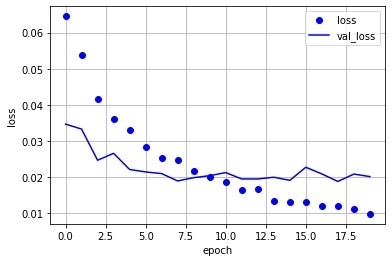

In [ ]:
plt.plot(range(nb_epoch), loss, 'bo', label='loss')
plt.plot(range(nb_epoch), val_loss, 'b', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

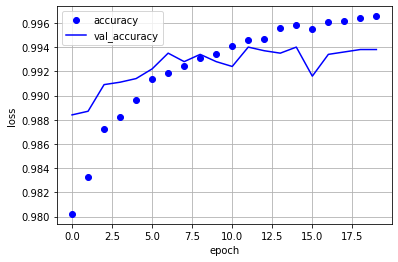

In [ ]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(nb_epoch), accuracy, 'bo', label='accuracy')
plt.plot(range(nb_epoch), val_accuracy, 'b', label='val_accuracy')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 訓練データの損失や精度を変数 score に格納し、表示する
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# 計算時間を小数点以下3桁までで表示する
print('Computation time:{0:.3f} sec'.format(time.time() - start_time))

Test loss: 0.05248311534523964
Test accuracy: 0.9835166931152344
Computation time:896.294 sec


In [ ]:
# テストデータの損失や精度を変数 score に格納し、表示する
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Computation time:{0:.3f} sec'.format(time.time() - start_time))

Test loss: 0.04577219858765602
Test accuracy: 0.9854000210762024
Computation time:900.072 sec
